# Data Driving Devices Analysis 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%matplotlib inline

In [21]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [22]:
data=pd.read_csv('Sample_Driving.csv')
data.head()

,Device ID,events,Harsh Acceleration event,Harsh Branking event,Over Speed event,Usage Anual Range
0,867162025148577,109,75,34,0,0 a 12k
1,867162025148578,90,23,21,46,25 a +40k
2,867162025482589,34,27,5,2,12 a 25k
3,867162025483033,58,48,2,8,25 a +40k
4,867162025484775,27,27,0,0,0 a 12k


## **Set de datos de un dispositivo IOT en autos particulares:**

   
**Device ID**:Nro de dispositivo. Campo unico por auto.   
**Event**: cantidad de eventos promedio por 100km de manejo.   
**Harsd Acceleration event**:cantidad de aceleradas bruscas promedio por 100km de manejo.   
**Harsd Braking event**:cantidad de frenadas bruscas promedio por 100km de manejo.   
**Over Speed event**:cantidad de veces superada la velocidad limite promedio por 100km.   
**Usage Anual Range**: Rango de uso promedio por año en kilometros.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14085 entries, 0 to 14084
Data columns (total 6 columns):
Device ID                   14085 non-null int64
events                      14085 non-null int64
Harsh Acceleration event    14085 non-null int64
Harsh Branking event        14085 non-null int64
Over Speed event            14085 non-null int64
Usage Anual Range           14085 non-null object
dtypes: int64(5), object(1)
memory usage: 660.4+ KB


No hay nulos!, veamos si hay dispositivos duplicados:

In [24]:
#Check ID duplicated
data['Device ID'].duplicated().sum()

0

In [25]:
data.rename(columns=lambda x: x.replace(' ','_').lower(),inplace=True)
data.columns

Index(['device_id', 'events', 'harsh_acceleration_event',
       'harsh_branking_event', 'over_speed_event', 'usage_anual_range'],
      dtype='object')

In [26]:
#rename for easier acces
data.columns=['device_id', 'events', 'harsh_acc',
       'harsh_brak', 'over_speed', 'usage']
data.head()

,device_id,events,harsh_acc,harsh_brak,over_speed,usage
0,867162025148577,109,75,34,0,0 a 12k
1,867162025148578,90,23,21,46,25 a +40k
2,867162025482589,34,27,5,2,12 a 25k
3,867162025483033,58,48,2,8,25 a +40k
4,867162025484775,27,27,0,0,0 a 12k


In [13]:
data.describe().round()

,device_id,events,harsh_acc,harsh_brak,over_speed
count,1.408500e+04,14085.0,14085.0,14085.0,14085.0
mean,8.671620e+14,346.0,164.0,169.0,12.0
std,8.240850e+05,450.0,195.0,267.0,48.0
min,8.671620e+14,0.0,0.0,0.0,0.0
25%,8.671620e+14,97.0,48.0,39.0,0.0
50%,8.671620e+14,215.0,107.0,93.0,0.0
75%,8.671620e+14,425.0,210.0,200.0,4.0
max,8.671620e+14,11259.0,4240.0,9872.0,1302.0


A priori podemos observar que frenos, aceleraciones y sobrepasos de velocidad son distribuciones right skewed. La mediana es casi la mitad de la media. La media está mucho mas cerca del 3Q (percentil 75$), y luego los valores máximos son significativamente grandes.

In [20]:
data.groupby(['usage']).mean().round(2)

,device_id,events,harsh_acc,harsh_brak,over_speed
usage,,,,,
0 a 12k,8.671620e+14,201.97,101.57,94.48,5.93
12 a 25k,8.671620e+14,336.90,165.47,160.39,11.04
25 a +40k,8.671620e+14,617.31,269.63,321.10,26.57


Al ver las medias separadas por uso anual del auto en km podría pensarse que puede haber algun tipo de relacion entre mas uso promedio y mayor promedio de eventos. Revisaremos las distribucions para entender si son simplemente más outliers, efectivamente una relacion.

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


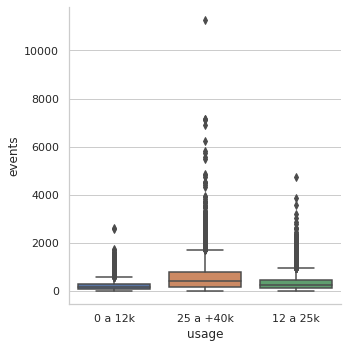

In [29]:
g=sns.factorplot('usage','events',data=data,kind='box')

Si bien las medias eran muy diferentes en cada uno de los rangos, las medianas no parecieran tener la misma relacion, pero si podemos ver que hay mas dispersion a medida que aumenta la cantidad de kilometros promedio por año. Es decir si hay mas casos extremos o más gente que maneja generando mas eventos.

Pareciera tener sentido revisar distintos grupos por cada uno de estos tres grupos para entenderlos en profundidad.

# CLUSTERS x Rango de KM Anuales Recorridos:

In [30]:
data.head()

,device_id,events,harsh_acc,harsh_brak,over_speed,usage
0,867162025148577,109,75,34,0,0 a 12k
1,867162025148578,90,23,21,46,25 a +40k
2,867162025482589,34,27,5,2,12 a 25k
3,867162025483033,58,48,2,8,25 a +40k
4,867162025484775,27,27,0,0,0 a 12k


In [31]:
data.groupby(['usage']).device_id.count()

usage
0 a 12k      4983
12 a 25k     6266
25 a +40k    2836
Name: device_id, dtype: int64

In [32]:
uso1=data[data['usage']=='0 a 12k']
uso2=data[data['usage']=='12 a 25k']
uso3=data[data['usage']=='25 a +40k']

In [33]:
print('Uso medio en Km por año de cada grupo')
print('uso 1:',12/2)
print('uso 2:',(25+12)/2, 'vs 1:',round(((25+12)/2)/6),2)
print('uso 3:',(40+25)/2, 'vs 1:', round(((40+25)/2)/6,2))

Uso medio en Km por año de cada grupo
uso 1: 6.0
uso 2: 18.5 vs 1: 3 2
uso 3: 32.5 vs 1: 5.42


Por la distribución probablemente el punto medio de 0 a 12, esté entre 8 y 10 KM, y el de 25 a +40 en algun valor mucho mas cercano a 25. Por lo que los factores de la base frecuencial deberían ser revisados para lograr tener informacion más precisa

## Grupo 1: 0-12Km

In [34]:
uso1.describe().round(2)

,device_id,events,harsh_acc,harsh_brak,over_speed
count,4.983000e+03,4983.00,4983.00,4983.00,4983.00
mean,8.671620e+14,201.97,101.57,94.48,5.93
std,8.213394e+05,214.84,106.18,113.60,22.97
min,8.671620e+14,0.00,0.00,0.00,0.00
25%,8.671620e+14,59.00,29.00,24.00,0.00
50%,8.671620e+14,142.00,73.00,59.00,0.00
75%,8.671620e+14,269.00,138.50,122.00,1.00
max,8.671620e+14,2628.00,1759.00,1866.00,465.00


Text(0.5, 1.0, 'Overspeed')

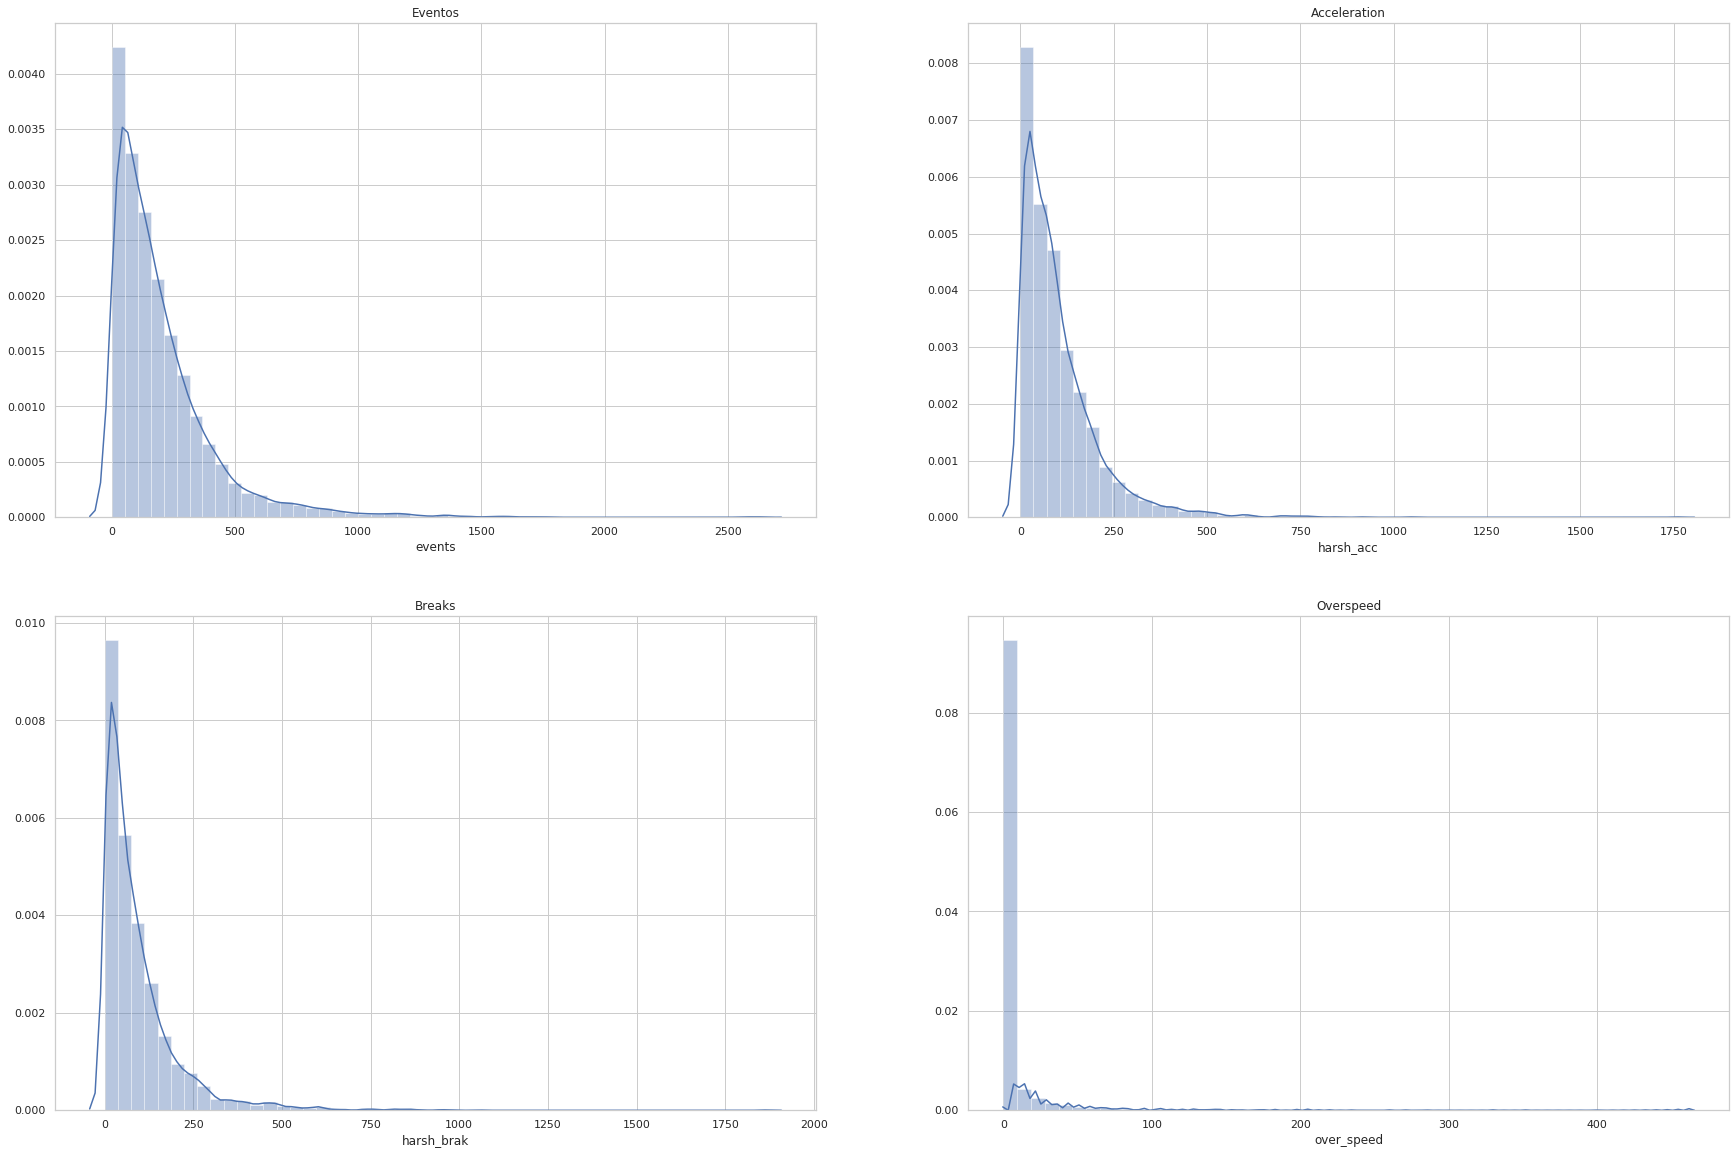

In [35]:
f,ax = plt.subplots(2,2,figsize=(30,20))

sns.distplot(uso1.events, ax=ax[0,0]);
ax[0,0].set_title('Eventos')

sns.distplot(uso1.harsh_acc, ax=ax[0,1]);
ax[0,1].set_title('Acceleration')

sns.distplot(uso1.harsh_brak, ax=ax[1,0]);
ax[1,0].set_title('Breaks')

sns.distplot(uso1.over_speed, ax=ax[1,1]);
ax[1,1].set_title('Overspeed')

In [39]:
uso1_clus=uso1[['harsh_acc','harsh_brak','over_speed']]

In [134]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


parameters={'init':['k-means++','random'],
           'n_init':[10,50,100],
           'tol':[0.01,0.001,0.0001],
           'n_clusters': np.arange(1,10)}


uso1_clus=uso1[['harsh_acc','harsh_brak','over_speed']]


grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(uso1_clus)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  9.6min finished


{'init': 'random', 'n_clusters': 9, 'n_init': 100, 'tol': 0.0001}

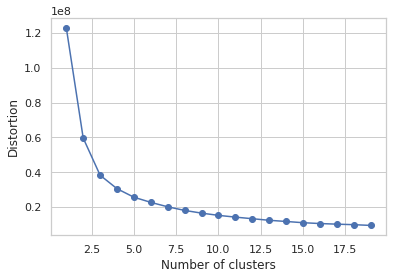

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='random',
        n_init=100, max_iter=300,
        tol=0.0001, random_state=42
    )
    km.fit(uso1_clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


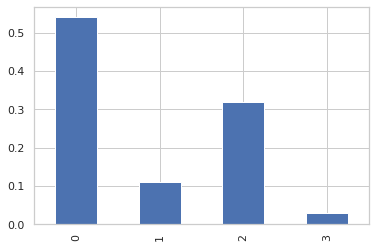

In [41]:
km1 = KMeans(
        n_clusters=4, init='random',
        n_init=100, max_iter=300,
        tol=0.0001, random_state=42)

km1.fit(uso1_clus)
uso1['cluster']=km1.labels_
uso1.cluster.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [42]:
uso1.groupby(['cluster'])['events','harsh_acc','harsh_brak','over_speed'].describe().stack()

events    harsh_acc   harsh_brak   over_speed
cluster                                                          
0       count  2691.000000  2691.000000  2691.000000  2691.000000
        mean     70.180230    37.600520    31.034188     1.545522
        std      46.324873    27.432117    24.072033     7.618584
        min       0.000000     0.000000     0.000000     0.000000
        25%      31.000000    14.000000    12.000000     0.000000
        50%      65.000000    33.000000    26.000000     0.000000
        75%     108.000000    58.000000    45.000000     0.000000
        max     302.000000   118.000000   129.000000   167.000000
1       count   542.000000   542.000000   542.000000   542.000000
        mean    512.911439   250.542435   245.221402    17.147601
        std     114.899633    84.561766    82.602465    43.474177
        min     360.000000    51.000000     2.000000     0.000000
        25%     421.000000   191.250000   186.250000     0.000000
        50%     477.000000   241.500000   238.500000     1.000000
        75%     586.500000   296.000000   287.750000    13.000000
        max    1087.000000   549.000000   566.000000   465.000000
2       count  1614.000000  1614.000000  1614.000000  1614.000000
        mean    246.513631   127.725527   112.277571     6.510533
        std      63.856634    44.387918    44.292059    19.481139
        min     152.000000    22.000000     8.000000     0.000000
        25%     192.000000    95.000000    79.250000     0.000000
        50%     235.500000   122.000000   106.500000     0.000000
        75%     292.750000   157.000000   140.000000     3.000000
        max     589.000000   277.000000   270.000000   284.000000
3       count   136.000000   136.000000   136.000000   136.000000
        mean   1041.830882   463.073529   537.757353    41.000000
        std     300.314491   195.819707   201.761373    63.795391
        min     711.000000   123.000000   230.000000     0.000000
        25%     841.750000   345.250000   406.000000     0.000000
        50%     952.000000   424.500000   496.000000    10.000000
        75%    1162.500000   529.000000   603.000000    50.250000
        max    2628.000000  1759.000000  1866.000000   329.000000

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


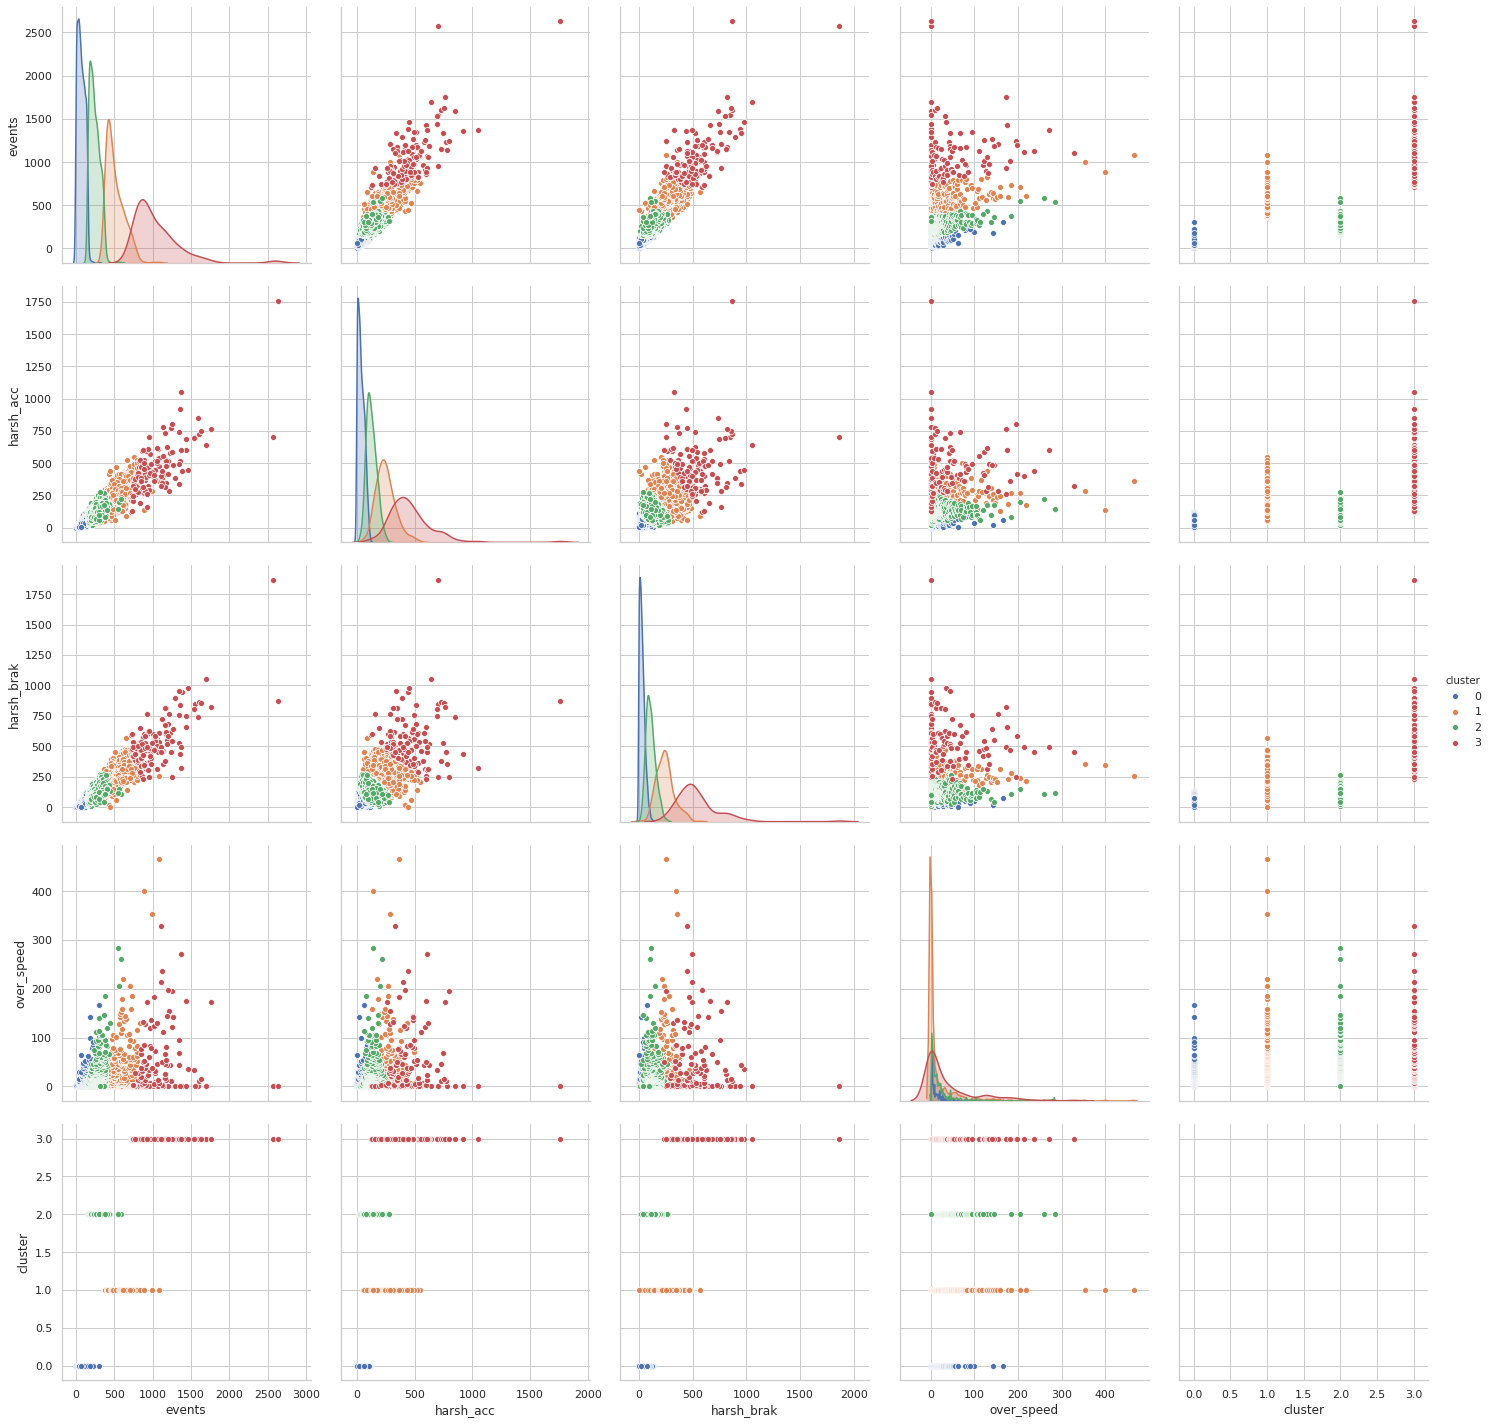

In [43]:
sns.pairplot(uso1[['events','harsh_acc','harsh_brak','over_speed','cluster']],hue='cluster',height=4)

## Grupo 2: 12-25Km

In [44]:
uso2.describe().round(2)

,device_id,events,harsh_acc,harsh_brak,over_speed
count,6.266000e+03,6266.00,6266.00,6266.00,6266.00
mean,8.671620e+14,336.90,165.47,160.39,11.04
std,8.259064e+05,339.89,164.53,182.73,39.91
min,8.671620e+14,0.00,0.00,0.00,0.00
25%,8.671620e+14,116.00,57.00,47.00,0.00
50%,8.671620e+14,238.50,121.00,103.00,0.00
75%,8.671620e+14,445.00,223.00,207.00,4.00
max,8.671620e+14,4730.00,2358.00,2899.00,1302.00


Text(0.5, 1.0, 'Overspeed')

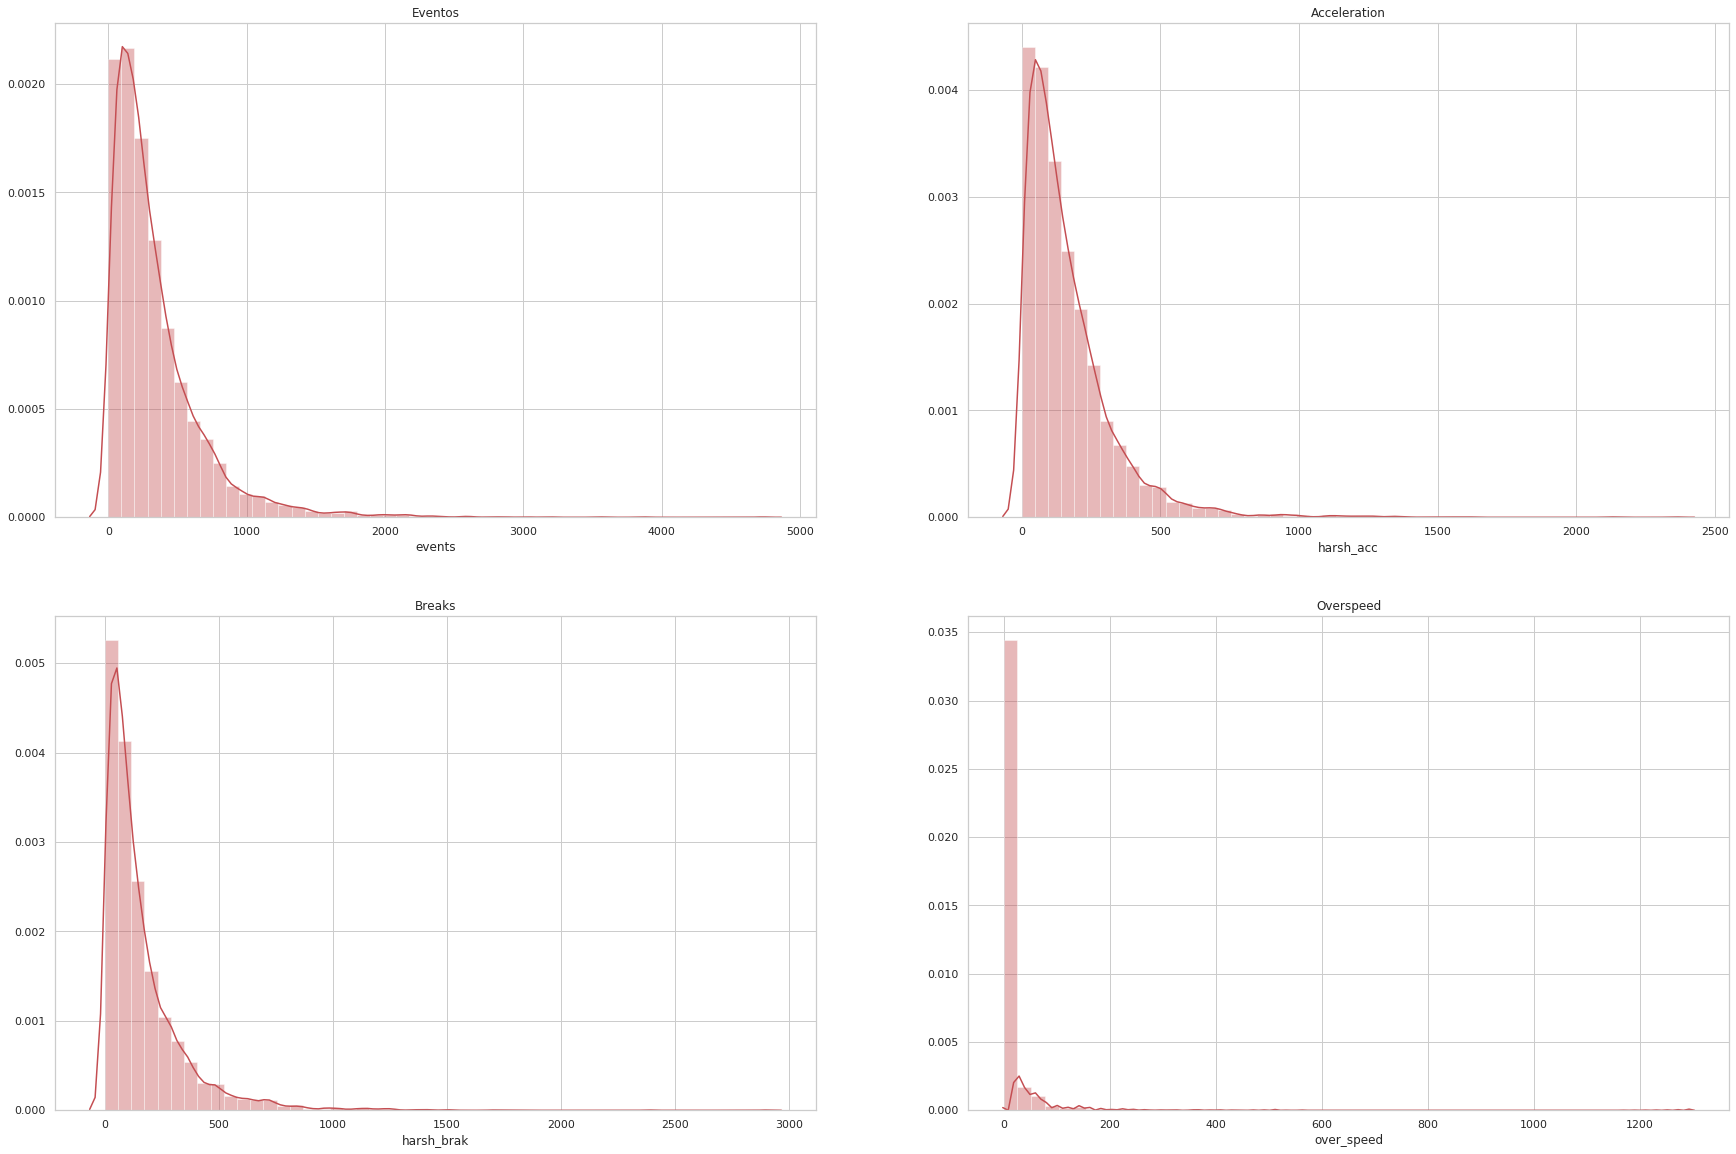

In [45]:
f,ax = plt.subplots(2,2,figsize=(30,20))

sns.distplot(uso2.events, ax=ax[0,0],color='r');
ax[0,0].set_title('Eventos')

sns.distplot(uso2.harsh_acc, ax=ax[0,1],color='r');
ax[0,1].set_title('Acceleration')

sns.distplot(uso2.harsh_brak, ax=ax[1,0],color='r');
ax[1,0].set_title('Breaks')

sns.distplot(uso2.over_speed, ax=ax[1,1],color='r');
ax[1,1].set_title('Overspeed')

In [146]:
parameters={'init':['k-means++','random'],
           'n_init':[10,50,100],
           'tol':[0.01,0.001,0.0001],
           'n_clusters': np.arange(1,10)}


uso2_clus=uso2[['harsh_acc','harsh_brak','over_speed']]


grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(uso2_clus)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 10.9min finished


{'init': 'k-means++', 'n_clusters': 9, 'n_init': 10, 'tol': 0.01}

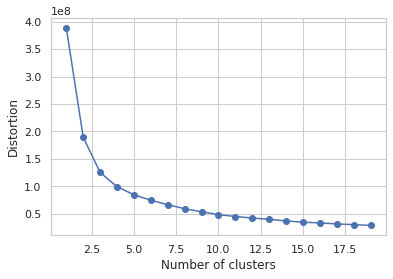

In [47]:
uso2_clus=uso2[['harsh_acc','harsh_brak','over_speed']]


distortions = []
for i in range(1, 20):
    
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.01, random_state=42
    )
    km.fit(uso2_clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


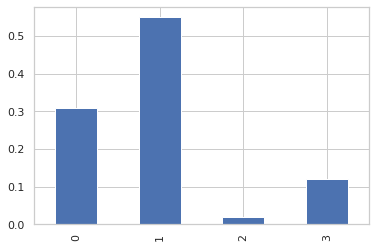

In [48]:
km2 = KMeans(
        n_clusters=4, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.01, random_state=42)

km2.fit(uso2_clus)
uso2['cluster']=km2.labels_
uso2.cluster.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [49]:
uso2.groupby(['cluster'])['events','harsh_acc','harsh_brak','over_speed'].describe().stack()

events    harsh_acc   harsh_brak   over_speed
cluster                                                          
0       count  1945.000000  1945.000000  1945.000000  1945.000000
        mean    408.613882   209.232905   187.415424    11.965553
        std     102.241240    72.579216    72.198053    33.931627
        min     256.000000    40.000000    12.000000     0.000000
        25%     324.000000   160.000000   134.000000     0.000000
        50%     390.000000   202.000000   177.000000     1.000000
        75%     481.000000   254.000000   233.000000     8.000000
        max     827.000000   519.000000   435.000000   413.000000
1       count  3437.000000  3437.000000  3437.000000  3437.000000
        mean    131.163224    68.719523    58.345650     4.098051
        std      76.346572    44.952962    40.229433    15.907785
        min       0.000000     0.000000     0.000000     0.000000
        25%      68.000000    32.000000    26.000000     0.000000
        50%     127.000000    63.000000    52.000000     0.000000
        75%     193.000000   100.000000    83.000000     1.000000
        max     550.000000   240.000000   239.000000   323.000000
2       count   146.000000   146.000000   146.000000   146.000000
        mean   1730.801370   763.589041   896.952055    70.260274
        std     526.168973   336.311507   331.975598   144.641104
        min    1214.000000   252.000000   375.000000     0.000000
        25%    1374.250000   531.500000   701.500000     1.000000
        50%    1584.500000   678.000000   823.000000    18.000000
        75%    1941.500000   935.750000  1033.250000    72.250000
        max    4730.000000  2358.000000  2899.000000  1302.000000
3       count   738.000000   738.000000   738.000000   738.000000
        mean    830.268293   382.376694   418.658537    29.233062
        std     182.200357   133.590147   126.931963    62.864459
        min     559.000000    32.000000   165.000000     0.000000
        25%     688.000000   291.000000   325.000000     0.000000
        50%     779.500000   368.500000   394.000000     4.000000
        75%     943.500000   466.000000   491.000000    29.750000
        max    1622.000000   878.000000   854.000000   514.000000

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


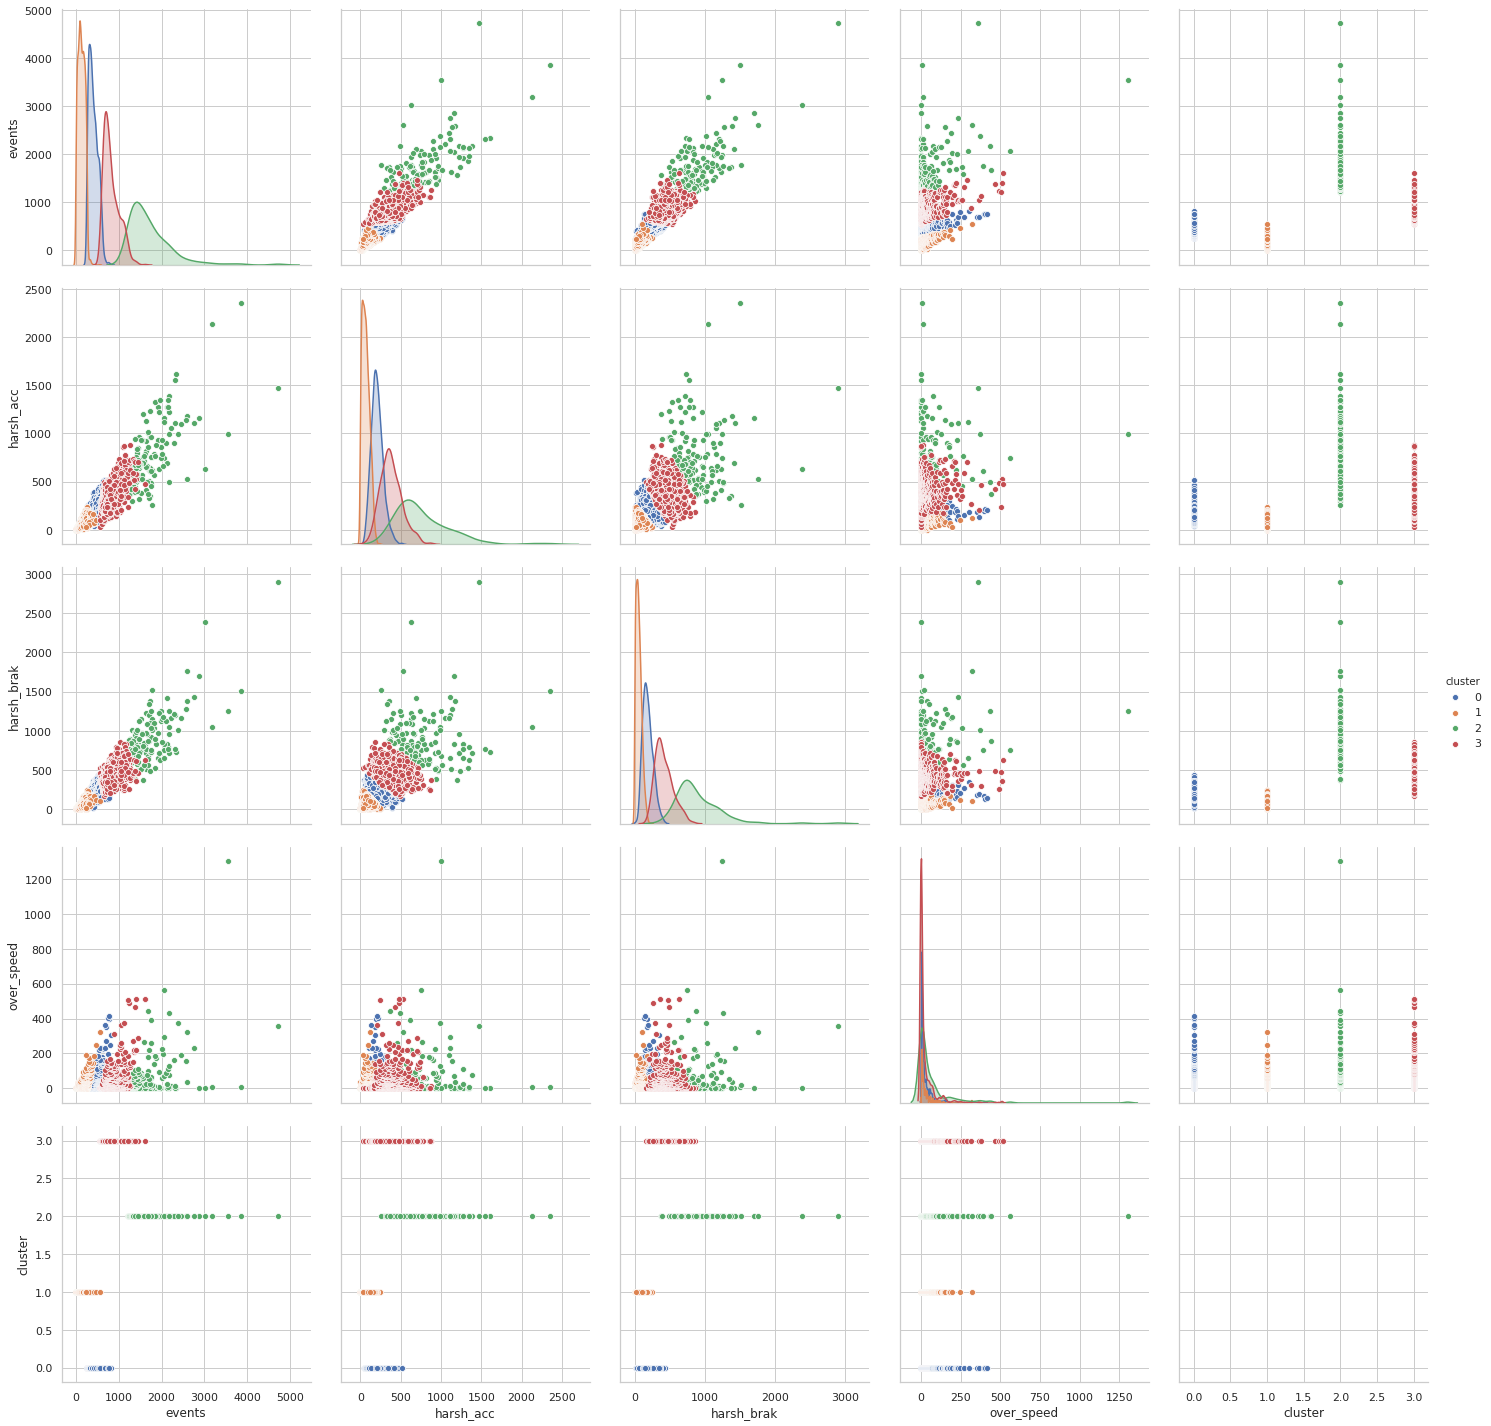

In [50]:
sns.pairplot(uso2[['events','harsh_acc','harsh_brak','over_speed','cluster']],hue='cluster',height=4)

## Grupo 3: 25 - +40Km:

In [51]:
uso3.describe().round(2)

,device_id,events,harsh_acc,harsh_brak,over_speed
count,2.836000e+03,2836.00,2836.00,2836.00,2836.00
mean,8.671620e+14,617.31,269.63,321.10,26.57
std,8.168323e+05,746.39,302.31,473.85,80.55
min,8.671620e+14,0.00,0.00,0.00,0.00
25%,8.671620e+14,173.75,82.00,72.00,0.00
50%,8.671620e+14,398.00,179.00,174.00,1.00
75%,8.671620e+14,788.00,360.00,394.00,15.00
max,8.671620e+14,11259.00,4240.00,9872.00,1090.00


Text(0.5, 1.0, 'Overspeed')

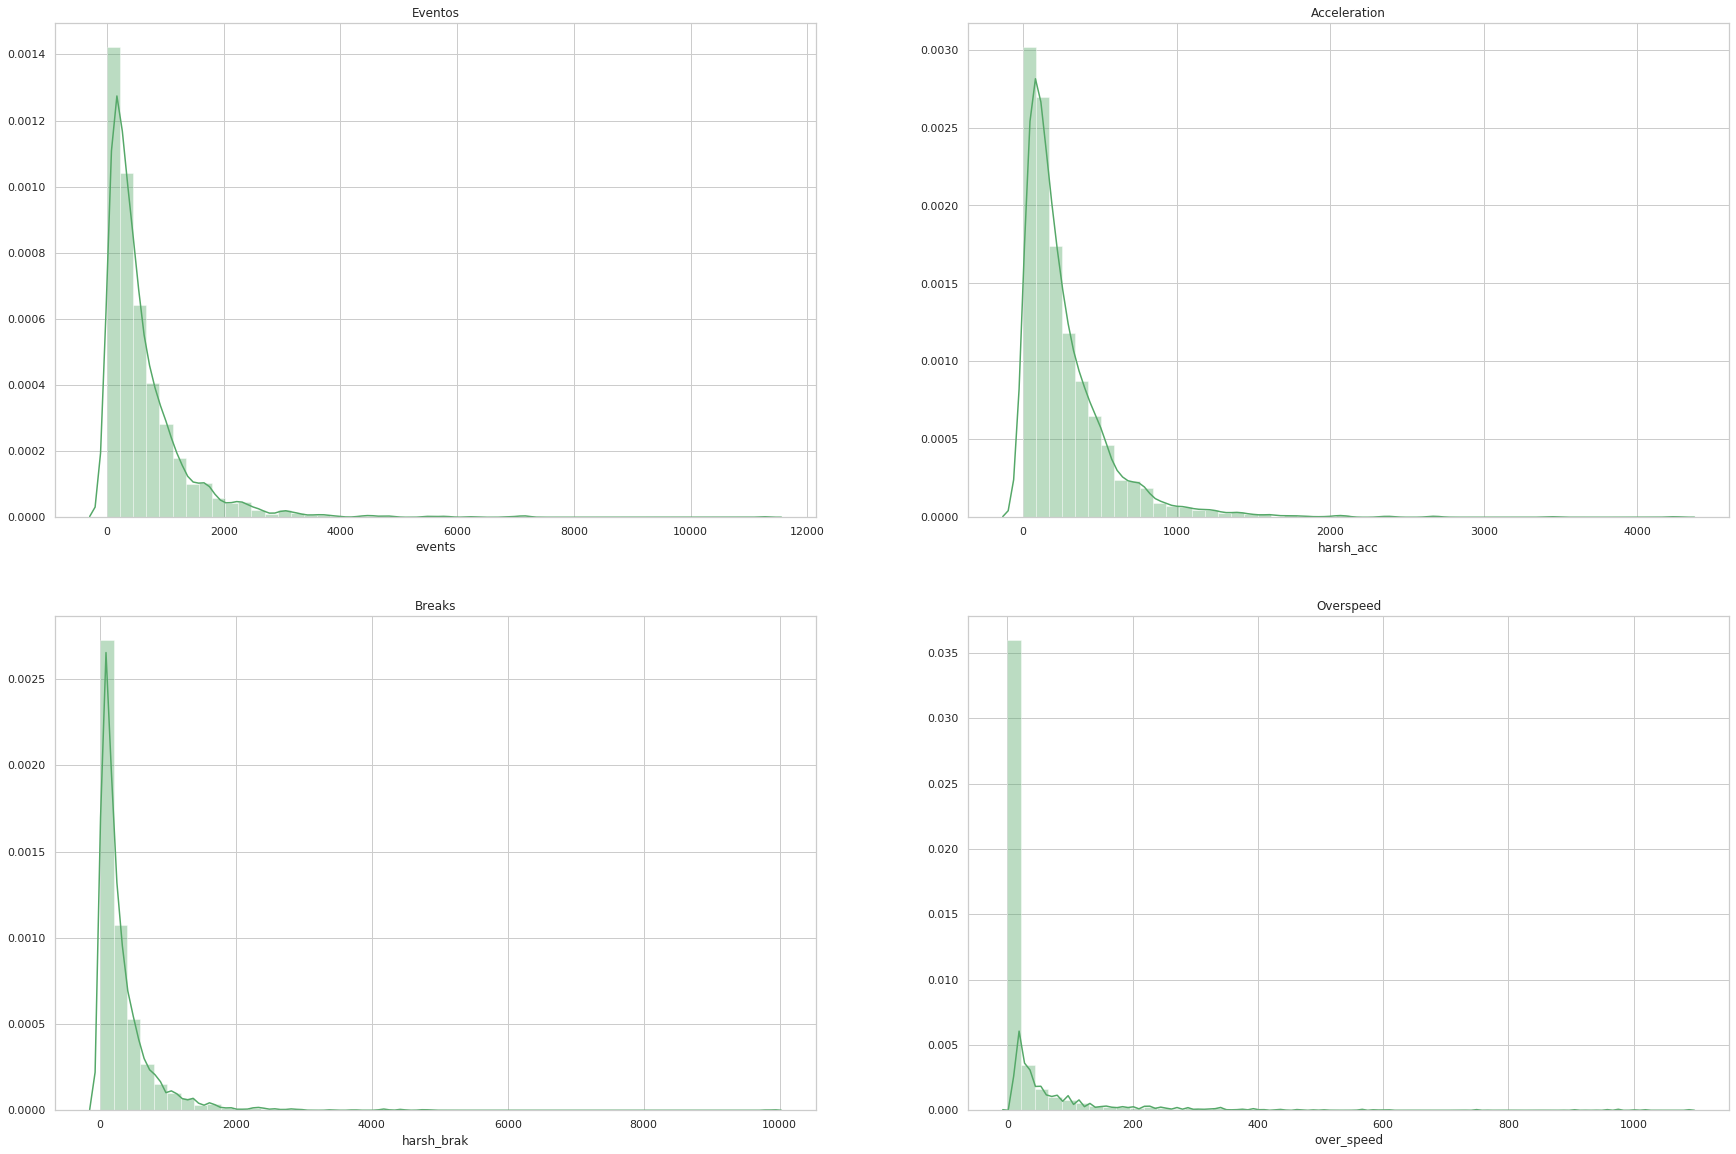

In [52]:
f,ax = plt.subplots(2,2,figsize=(30,20))

sns.distplot(uso3.events, ax=ax[0,0],color='g');
ax[0,0].set_title('Eventos')

sns.distplot(uso3.harsh_acc, ax=ax[0,1],color='g');
ax[0,1].set_title('Acceleration')

sns.distplot(uso3.harsh_brak, ax=ax[1,0],color='g');
ax[1,0].set_title('Breaks')

sns.distplot(uso3.over_speed, ax=ax[1,1],color='g');
ax[1,1].set_title('Overspeed')

In [172]:
parameters={'init':['k-means++','random'],
           'n_init':[10,50,100],
           'tol':[0.01,0.001,0.0001],
           'n_clusters': np.arange(1,10)}


uso3_clus=uso3[['harsh_acc','harsh_brak','over_speed']]


grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(uso3_clus)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  4.8min finished


{'init': 'random', 'n_clusters': 9, 'n_init': 10, 'tol': 0.001}

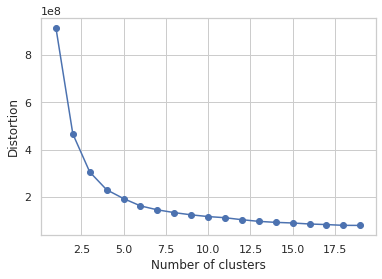

In [53]:
uso3_clus=uso3[['harsh_acc','harsh_brak','over_speed']]

distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=0.001, random_state=42
    )
    km.fit(uso3_clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


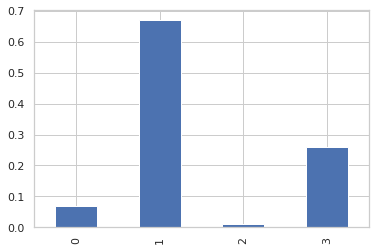

In [54]:
km3 = KMeans(
        n_clusters=4, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.001, random_state=42)

km3.fit(uso3_clus)
uso3['cluster']=km3.labels_
uso3.cluster.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [55]:
uso3.groupby(['cluster'])['events','harsh_acc','harsh_brak','over_speed'].describe().stack()

events    harsh_acc   harsh_brak   over_speed
cluster                                                           
0       count    204.000000   204.000000   204.000000   204.000000
        mean    2239.029412   869.637255  1284.504902    84.887255
        std      607.175752   410.033203   411.399791   172.979318
        min     1376.000000   118.000000   689.000000     0.000000
        25%     1752.750000   611.750000   995.250000     1.000000
        50%     2121.000000   791.500000  1174.000000    15.500000
        75%     2532.000000  1067.250000  1467.750000    72.000000
        max     4873.000000  3446.000000  2586.000000  1090.000000
1       count   1888.000000  1888.000000  1888.000000  1888.000000
        mean     260.434322   127.830508   119.265890    13.337924
        std      172.647488    91.613575    90.265382    46.134526
        min        0.000000     0.000000     0.000000     0.000000
        25%      116.000000    54.000000    46.000000     0.000000
        50%      236.500000   109.000000   100.000000     0.000000
        75%      397.000000   185.000000   175.250000     5.000000
        max     1360.000000   485.000000   438.000000   971.000000
2       count     18.000000    18.000000    18.000000    18.000000
        mean    5775.777778  1828.611111  3883.000000    64.166667
        std     1755.157897   857.454244  1701.839351   156.357904
        min     3689.000000   637.000000  2426.000000     0.000000
        25%     4532.250000  1346.500000  2798.750000     1.250000
        50%     5516.000000  1713.000000  3565.000000    11.500000
        75%     6746.750000  2283.250000  4360.500000    29.000000
        max    11259.000000  4240.000000  9872.000000   608.000000
3       count    726.000000   726.000000   726.000000   726.000000
        mean     961.783747   431.152893   486.950413    43.680441
        std      272.514177   176.285560   178.115926    95.594386
        min      559.000000    48.000000    20.000000     0.000000
        25%      738.000000   312.250000   354.250000     0.000000
        50%      905.000000   411.000000   462.500000     4.000000
        75%     1134.750000   520.750000   598.500000    41.000000
        max     1750.000000  1280.000000  1064.000000  1004.000000

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


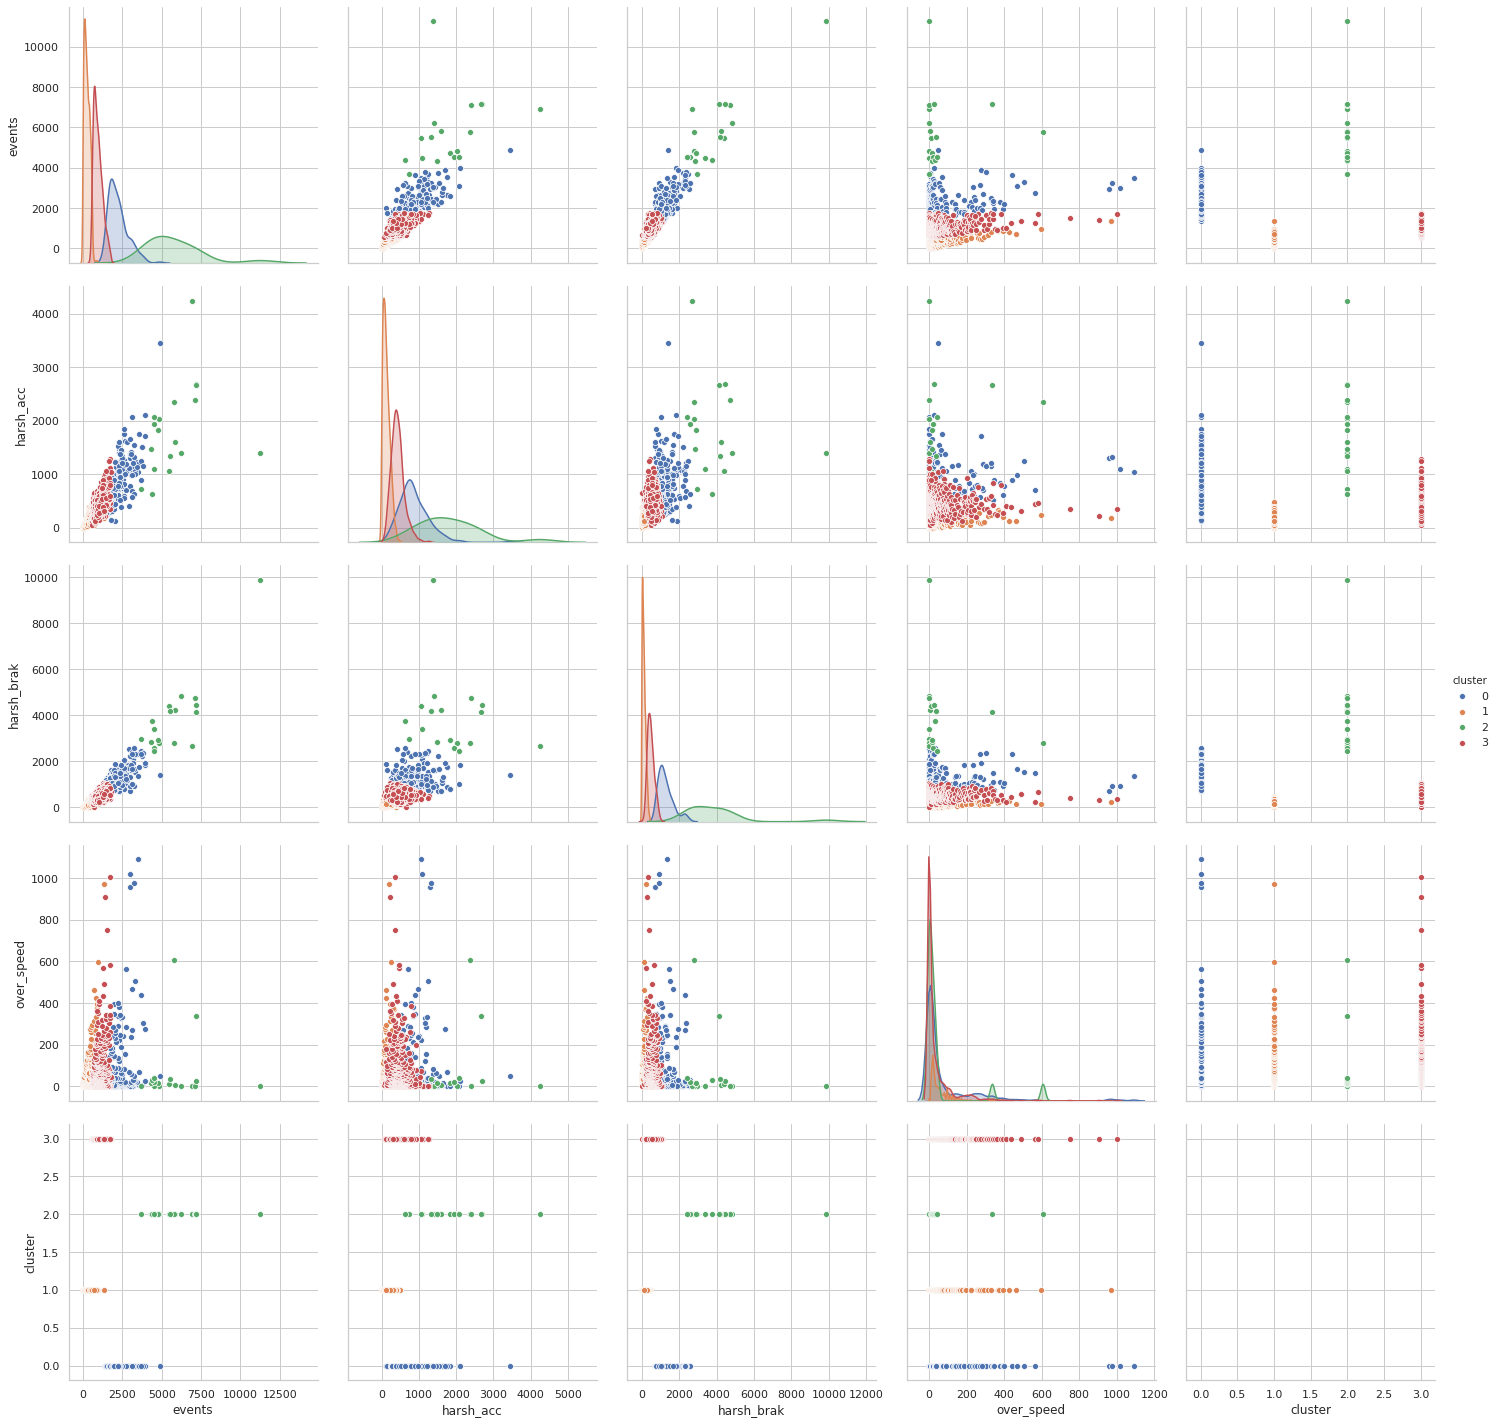

In [56]:
sns.pairplot(uso3[['events','harsh_acc','harsh_brak','over_speed','cluster']],hue='cluster',height=4)

Con 4 clusters en cada uno de los los tres rangos de Cantidad de kilometros recorridos por año, se puede encontrar grupos que representan 55%/35%/10%/5%.

El mayor grupo tiene la cualidad de tener una media un tercio de la media del rango. Por lo que existe un 50% de los conductores que son 3 veces mejores que el resto de sus propio grupo y tambien estan por debajo de la media general

Como no tenemos información de cuanto impacto y que relacón tiene la cantidad de kilometros promedio reccorridos por año, también vamos a probar generar clusters con todo el universo incluído para ver si los grupos a identificar generan un mejor entendimiento de los conductores.

# CLUSTERS Eventos sin considerar Rangos:

Text(0.5, 1.0, 'Overspeed')

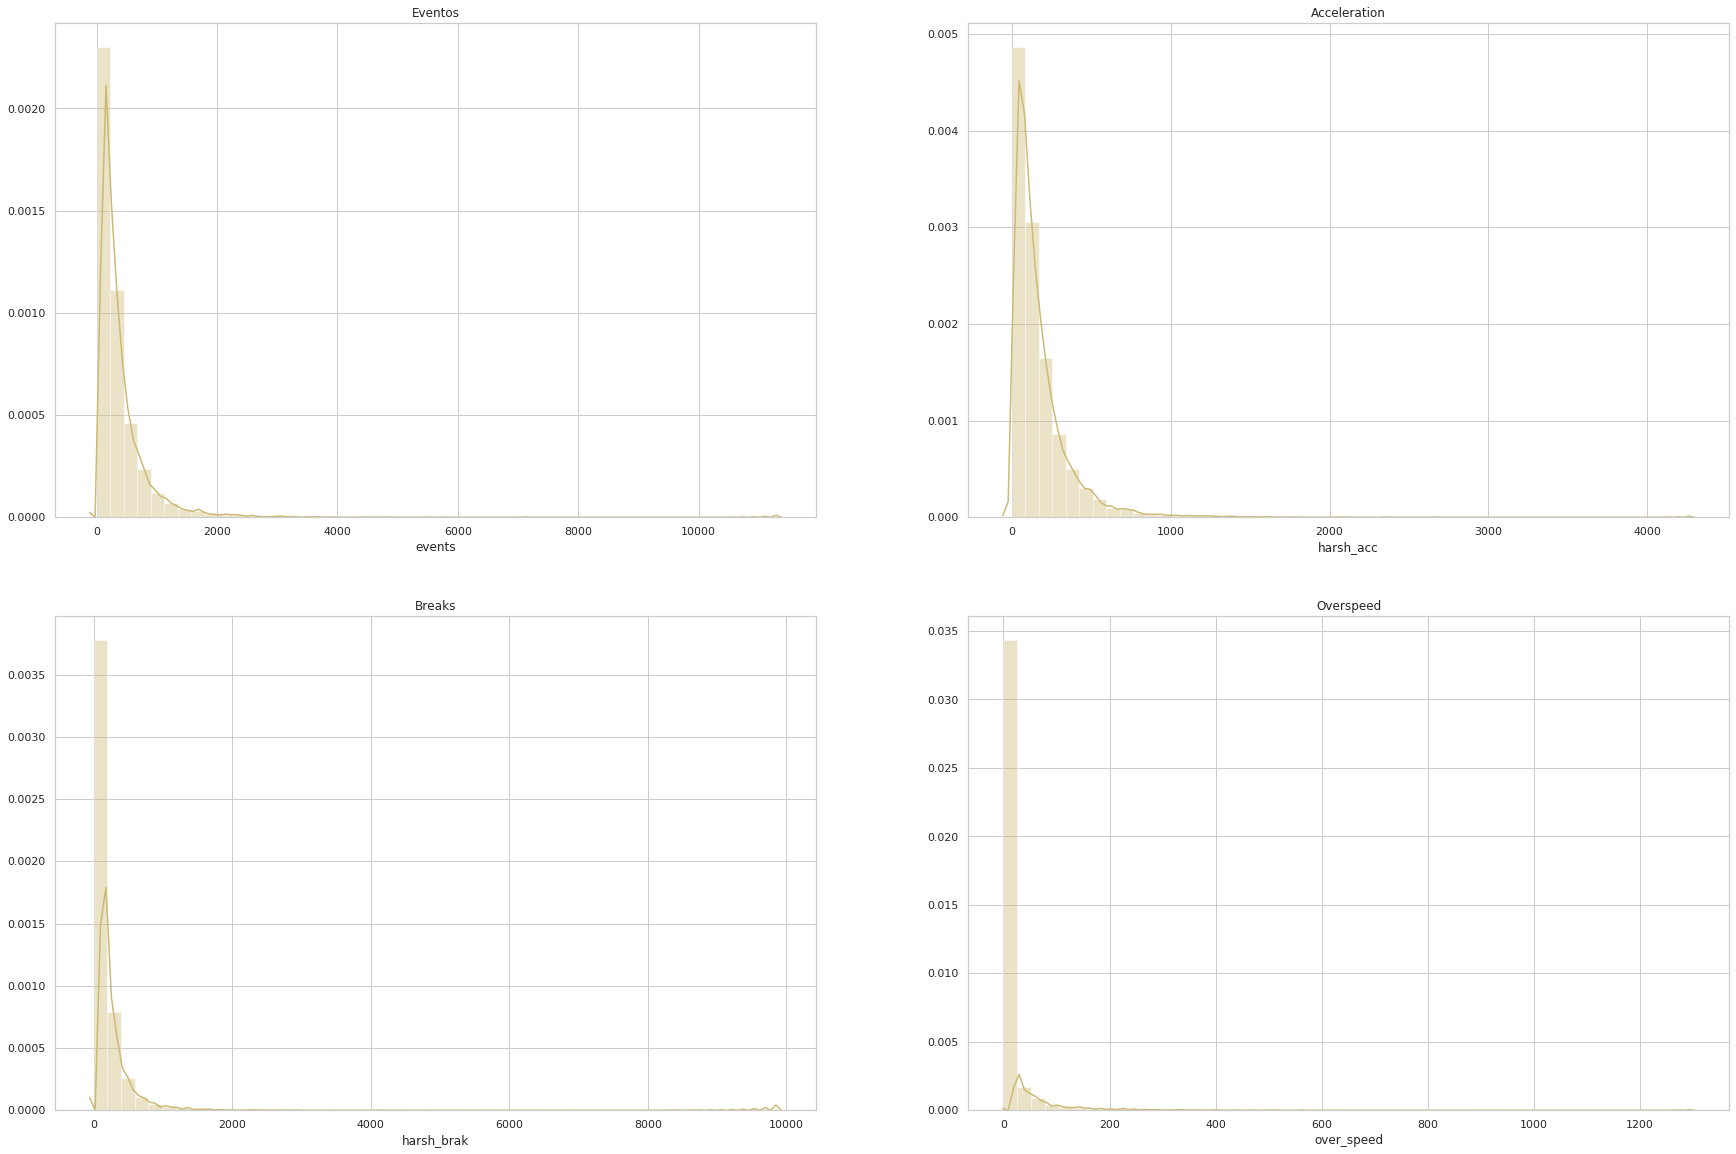

In [57]:
f,ax = plt.subplots(2,2,figsize=(30,20))

sns.distplot(data.events, ax=ax[0,0],color='y');
ax[0,0].set_title('Eventos')

sns.distplot(data.harsh_acc, ax=ax[0,1],color='y');
ax[0,1].set_title('Acceleration')

sns.distplot(data.harsh_brak, ax=ax[1,0],color='y');
ax[1,0].set_title('Breaks')

sns.distplot(data.over_speed, ax=ax[1,1],color='y');
ax[1,1].set_title('Overspeed')

In [180]:
parameters={'init':['k-means++','random'],
           'n_init':[10,50,100],
           'tol':[0.01,0.001,0.0001],
           'n_clusters': np.arange(1,10)}


data_clus=data[['harsh_acc','harsh_brak','over_speed']]


grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(data_clus)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 20.6min finished


{'init': 'k-means++', 'n_clusters': 9, 'n_init': 100, 'tol': 0.01}

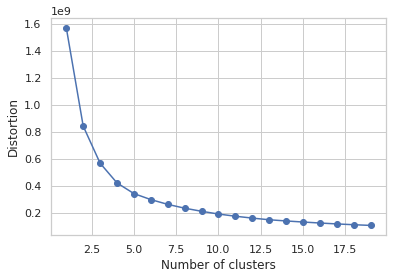

In [58]:
data_clus=data[['harsh_acc','harsh_brak','over_speed']]

distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=100, max_iter=300,
        tol=0.01, random_state=42
    )
    km.fit(data_clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

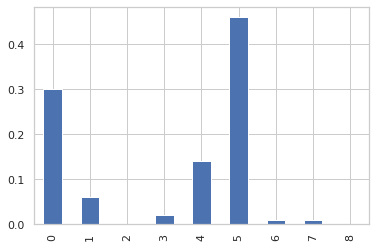

In [59]:
km4 = KMeans(
        n_clusters=9, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.001, random_state=42)

km4.fit(data_clus)
data3=data.copy()
data3['cluster3']=km4.labels_
data3.cluster3.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [60]:
data3.cluster3.value_counts().round(2).sort_index()#.plot(kind='bar')

0    4209
1     860
2      18
3     257
4    2026
5    6547
6      78
7      89
8       1
Name: cluster3, dtype: int64

In [204]:
data3.groupby(['cluster3'])['events','harsh_acc','harsh_brak','over_speed'].mean().round(2)

,events,harsh_acc,harsh_brak,over_speed
cluster3,,,,
0,301.38,157.22,134.01,10.15
1,1018.47,468.32,505.89,44.27
2,5413.06,1833.33,3495.61,84.11
3,1583.82,561.70,966.20,55.93
4,589.21,277.98,290.14,21.09
5,92.74,48.50,41.38,2.87
6,2756.88,933.58,1719.51,103.79
7,2157.02,1245.43,823.54,88.06
8,11259.00,1387.00,9872.00,0.00


In [62]:
data3.groupby(['cluster3'])['events','harsh_acc','harsh_brak','over_speed'].describe().stack()

events    harsh_acc   harsh_brak   over_speed
cluster3                                                           
0        count   4209.000000  4209.000000  4209.000000  4209.000000
         mean     301.382751   157.224281   134.011642    10.146828
         std       76.611478    56.059036    50.949857    32.025645
         min      182.000000    17.000000     2.000000     0.000000
         25%      238.000000   117.000000    97.000000     0.000000
...                      ...          ...          ...          ...
8        min    11259.000000  1387.000000  9872.000000     0.000000
         25%    11259.000000  1387.000000  9872.000000     0.000000
         50%    11259.000000  1387.000000  9872.000000     0.000000
         75%    11259.000000  1387.000000  9872.000000     0.000000
         max    11259.000000  1387.000000  9872.000000     0.000000

[71 rows x 4 columns]

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


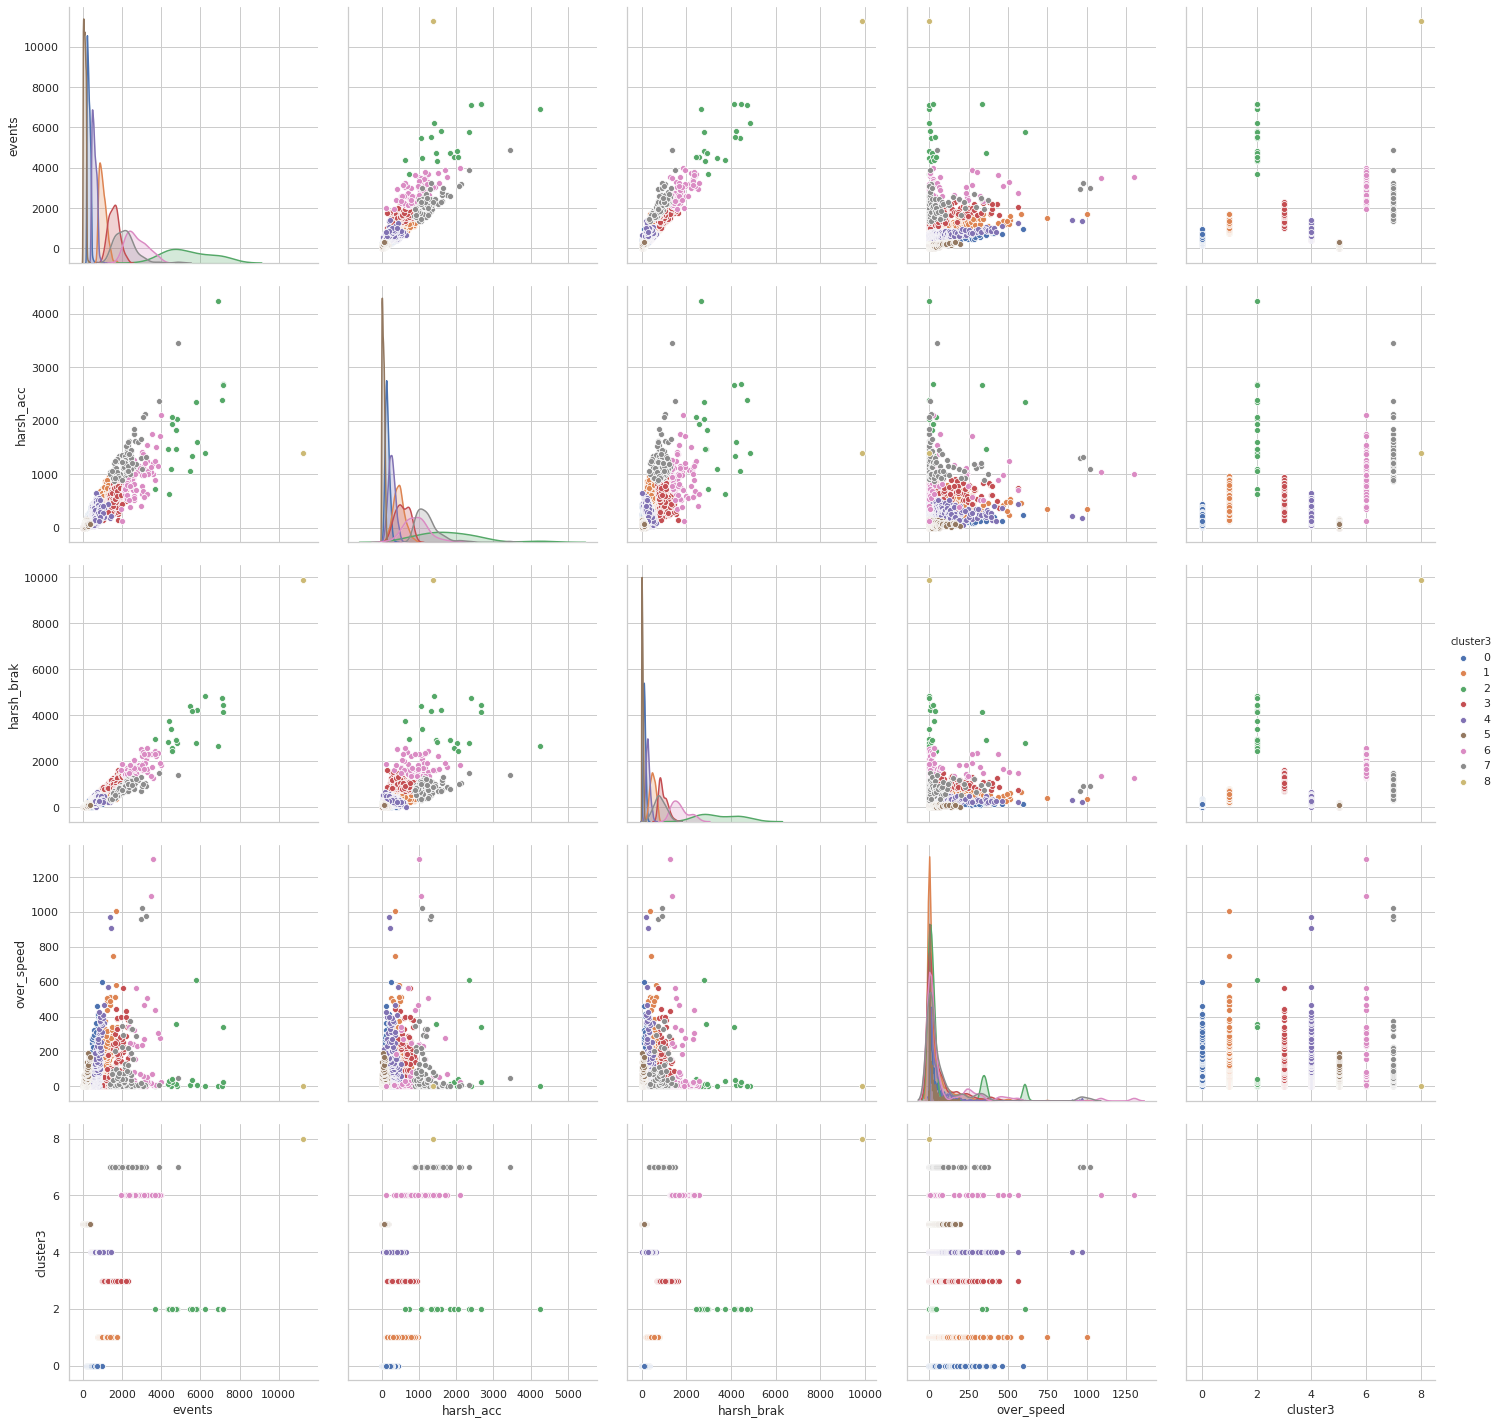

In [63]:
sns.pairplot(data3[['events','harsh_acc','harsh_brak','over_speed','cluster3']],hue='cluster3',height=4)

De esta forma también podemos encontrar un +40% de conductores que promedian un tercio de eventos que la media cada 100km. Pero en esta segmentacion el peso la cantidad de tiempo expuesto del auto durante el año claramente no tiene tanto peso ( lo podemos verificar ya que los grupos se parecen a los individuales), y siendo desconocido el efecto en la siniestralidad final, en este caso en particular es mejor mantener ambos efectos por separado.

Pues no sabemos quien tiene menos probabilidades de tener un siniestro, un buen conductor que maneja 20k kilometros por año, o un conductor medio que maneja 10k kilometros por año.

# Reglas OPCION 1:

Por último, teniendo en cuenta los 12 clusters generados como opcion 1, correremos un árbol de decision para definir reglas de clusterización. Podrían servir ante un análisis estático de nuevos casos. También para que el departamento de producto pueda entender los perfiles y reglas, y entender la propuesta a medida de cada uno de los distintos tipos de asegurados.

In [69]:
#Unir data set de los tres tiops de Km x año con sus respectivos Clusters

data_f=pd.concat([uso1,uso2,uso3])
data_f.shape

(14085, 7)

In [74]:
#Funcion para pasar de 4 cluster por grupo a 12 clusters totales con distintos nros
def final_cluster(rows):
    group=rows[0]
    clus=rows[1]
    if group == '12 a 25k':
        return clus+4
    elif group=='25 a +40k':
        return clus+8
    else:
        return clus

In [75]:

data_f['cluster_f']=data_f[['usage','cluster']].apply(final_cluster,axis=1)

In [103]:
media=data_f.groupby(['cluster_f']).events.mean().round(2).sort_index()
std=data_f.groupby(['cluster_f']).events.std().round(2).sort_index()
count=data_f.groupby(['cluster_f']).events.count().sort_index()

In [111]:
tabla_resumen=pd.concat([media,std,count],axis=1)
tabla_resumen.columns=['mu','dev_std','cases']
tabla_resumen['perc']=(tabla_resumen.cases/tabla_resumen.cases.sum()*100).round(2)
tabla_resumen.sort_values(by='mu')

,mu,dev_std,cases,perc
cluster_f,,,,
0,70.18,46.32,2691,19.11
5,131.16,76.35,3437,24.40
2,246.51,63.86,1614,11.46
9,260.43,172.65,1888,13.40
4,408.61,102.24,1945,13.81
1,512.91,114.90,542,3.85
7,830.27,182.20,738,5.24
11,961.78,272.51,726,5.15
3,1041.83,300.31,136,0.97


In [114]:
data_arbol=data_f[['harsh_acc','harsh_brak','over_speed','usage','cluster_f']]

In [115]:
#Creando OneHot Encoding for categorical data
data_arbol=pd.get_dummies(data_arbol,columns=['usage'],drop_first=True)
data_arbol.head()

,harsh_acc,harsh_brak,over_speed,cluster_f,usage_12 a 25k,usage_25 a +40k
0,75,34,0,0,0,0
4,27,0,0,0,0,0
6,204,97,0,2,0,0
7,46,23,0,0,0,0
8,84,66,0,0,0,0


In [116]:
# Imports needed
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [126]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split

X=data_arbol.drop('cluster_f',axis=1)
y=data_arbol.cluster_f


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

parameters={'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'min_samples_leaf':[10,50,100],#min nbr to bea a node
            'min_samples_split':[10,20,50],#min nbr of samples to split internal node
           'max_depth':np.arange(3,len(data_arbol.cluster_f.unique())+1)}

tree_model=tree.DecisionTreeClassifier(random_state=42)

grid_search=GridSearchCV(tree_model,parameters,cv=5,verbose=True)
grid_search.fit(X_train,y_train)
print('Mejores parametros:',grid_search.best_params_)
print('Accuracy:' ,grid_search.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mejores parametros: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.9696114600811715


[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   13.9s finished


In [131]:

accuracies = list()
depth_range = range(1, len(data_arbol.cluster_f.unique()) + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=10,
                                             min_samples_leaf=10,
                                             splitter='best',
                                             max_depth = depth,
                                            random_state=42)

    tree_model.fit(X_train,y_train)
    y_pred=tree_model.predict(X_test)
    valid_acc = accuracy_score(y_pred,y_test) 
    accuracies.append(valid_acc)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Accuracy": accuracies})
df = df[["Max Depth", "Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Accuracy
         1  0.440659
         2  0.662976
         3  0.832482
         4  0.884725
         5  0.924191
         6  0.950028
         7  0.966212
         8  0.976434
         9  0.977286
        10  0.977286
        11  0.977853
        12  0.977853


In [132]:
#Revision de resultados:
from sklearn.metrics import classification_report

tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=10,
                                             min_samples_leaf=10,
                                             splitter='best',
                                             max_depth = 5,
                                            random_state=42)
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)

print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       693
           1       0.96      0.67      0.79       186
           2       0.80      0.92      0.85       361
           3       0.62      1.00      0.77        20
           4       0.95      0.88      0.91       509
           5       0.94      1.00      0.97       817
           6       0.71      0.88      0.79        25
           7       0.96      0.86      0.90       232
           8       0.87      0.84      0.85        56
           9       0.99      0.95      0.97       473
          10       1.00      1.00      1.00         6
          11       0.80      0.92      0.86       144

    accuracy                           0.92      3522
   macro avg       0.88      0.91      0.89      3522
weighted avg       0.93      0.92      0.92      3522



In [133]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_pred,y_test))

[[659   0  34   0   0   0   0   0   0   0   0   0]
 [  0 125  49  12   0   0   0   0   0   0   0   0]
 [ 25   5 331   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20   0   0   0   0   0   0   0   0]
 [  0   0   0   0 450  53   0   6   0   0   0   0]
 [  0   0   0   0   2 815   0   0   0   0   0   0]
 [  0   0   0   0   0   0  22   3   0   0   0   0]
 [  0   0   0   0  24   0   9 199   0   0   0   0]
 [  0   0   0   0   0   0   0   0  47   0   0   9]
 [  0   0   0   0   0   0   0   0   0 448   0  25]
 [  0   0   0   0   0   0   0   0   0   0   6   0]
 [  0   0   0   0   0   0   0   0   7   4   0 133]]


In [159]:
# exportar el modelo a archivo .dot

from sklearn.tree import export_graphviz
import os

PROJECT_ROOT_DIR = "/home/alex/Desktop/GitHub_repo"
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


export_graphviz(tree_model,
                out_file=os.path.join(IMAGES_PATH, "tree_model.dot"))
                #feature_names = list(data_arbol.drop(['cluster_f'], axis=1)),
                #class_names = data_arbol.cluster_f)
        
# Convertir el archivo .dot a png para poder visualizarlo
#check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
#PImage("tree1.png")

In [157]:
list(data_arbol.drop(['cluster_f'], axis=1))

['harsh_acc', 'harsh_brak', 'over_speed', 'usage_12 a 25k', 'usage_25 a +40k']

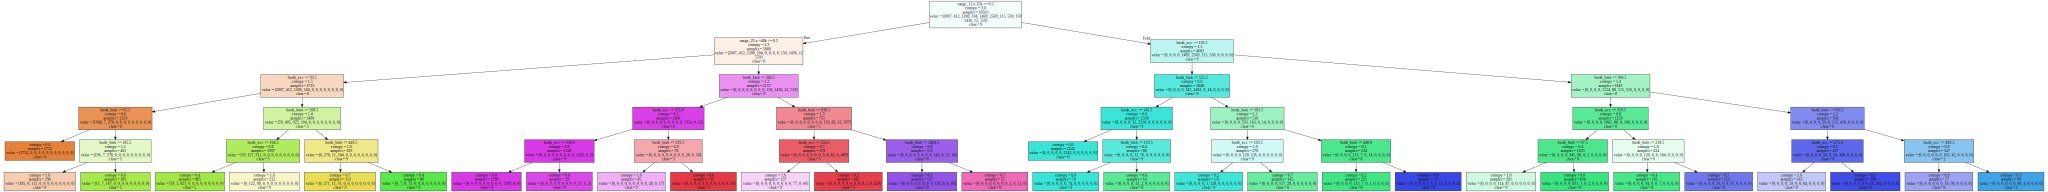

In [182]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_model,out_file="tree_model.dot",class_names=data_arbol.cluster_f.astype(str),feature_names=list(data_arbol.drop(['cluster_f'], axis=1)),precision=1,filled=True)
with open("tree_model.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [183]:
import pydot
(graph, ) = pydot.graph_from_dot_file('tree_model.dot')

graph.write_png('tree_model.png');

Con un árbol de decision de 5 nodos de profundidad, podemos predecir con +90% los clusters de cada uno de los conductores. Probablemente, hubiera sido más claro para el equipo de producto hacer tres arboles por cada uno de los grupos uso, ya que en definitiva los grupos fueron clusterizados de forma seaparada.